In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_csv('src/data_tms.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df = df.dropna(subset=['Age', 'Embarked'])
df1 = df.drop(columns=['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'])

In [7]:
df1.Sex = df.Sex.map({
    'male': 1,
    'female': 0
})
df1.Embarked = df.Embarked.map({
    'S': 0,
    'C': 1,
    'Q': 2
})

In [186]:
X = df1
y = df.Survived

In [142]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [130]:
kmeans = KMeans(n_clusters=5)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
kmeans.fit(X_pca)

labels_km = kmeans.labels_

In [103]:
centroids = kmeans.cluster_centers_
centroids

array([[ 0.29751113,  1.42107513],
       [ 0.73196122, -3.19398167],
       [-1.18765107,  0.1962966 ],
       [ 2.49218589,  0.57407825],
       [ 0.0732496 , -0.79770782]])

Text(0.5, 1.0, 'PCA: 2D projection of clusters')

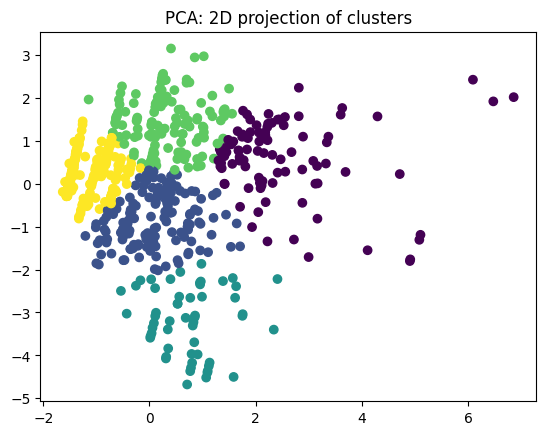

In [131]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_km, cmap='viridis')
plt.title('PCA: 2D projection of clusters')

Text(0.5, 1.0, 't-SNE visualization of clusters')

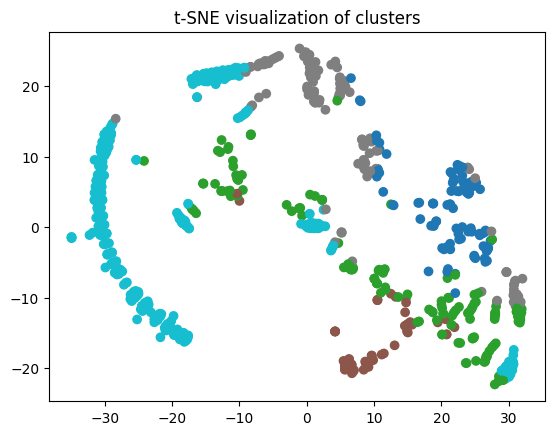

In [132]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_km, cmap='tab10')
plt.title('t-SNE visualization of clusters')

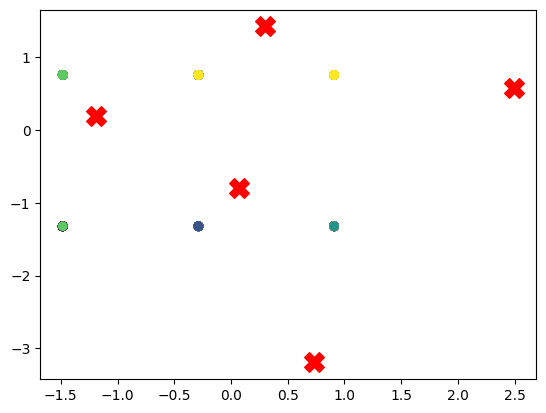

In [133]:
plt.scatter(X[:, 0], X[:, 1], c=labels_km, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200)

Text(0, 0.5, 'Сумма внутрикластерных расстояний')

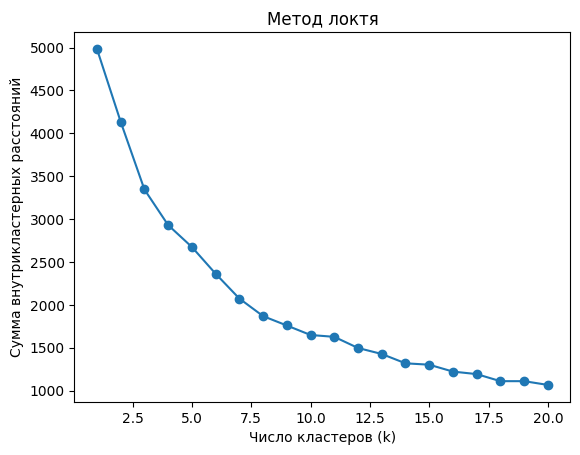

In [77]:
inertia = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
# Строим график
plt.plot(range(1, 21), inertia, marker='o')
plt.title("Метод локтя")
plt.xlabel("Число кластеров (k)")
plt.ylabel("Сумма внутрикластерных расстояний")

In [78]:
from sklearn.cluster import DBSCAN

In [167]:
dbscan = DBSCAN(eps=0.6, min_samples=5)
dbscan.fit(X)
labels_db = dbscan.labels_

In [ ]:
labels_db

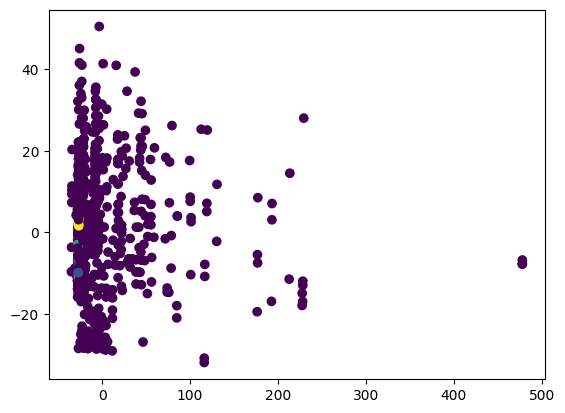

In [171]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_db, cmap='viridis')

In [126]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=df1.columns)
loadings

,PC1,PC2
Pclass,-0.523439,-0.382564
Sex,-0.368915,0.195630
Age,0.104615,0.562863
SibSp,0.219389,-0.518233
Parch,0.321083,-0.464445
Fare,0.609009,0.097499
Embarked,0.238434,0.069124


In [178]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering().fit(X_pca)
labels_agg = clustering.labels_

In [ ]:
labels_agg

In [175]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

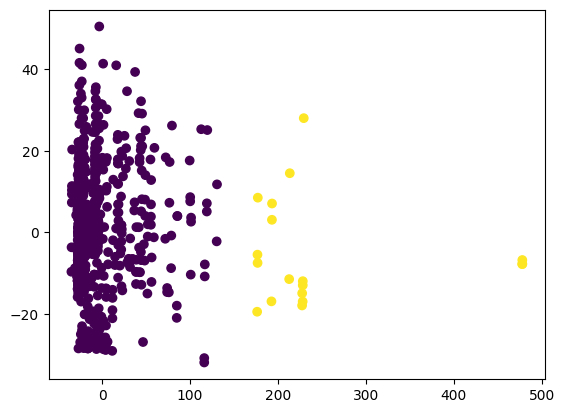

In [179]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_agg, cmap='viridis')

C:\Users\masha\AppData\Local\Temp\ipykernel_6908\1107688280.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')


Text(0, 0.5, 'Признак 2')

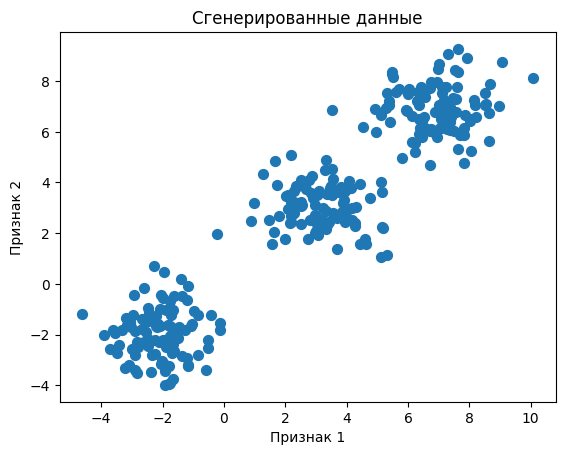

In [183]:
# Генерация случайных данных
np.random.seed(42)
# Создаем 2D-данные: 300 объектов, 2 признака
X = np.concatenate([np.random.normal(loc=-2, scale=1, size=(100, 2)),
                   np.random.normal(loc=3, scale=1, size=(100, 2)),
                   np.random.normal(loc=7, scale=1, size=(100, 2))])
# Визуализируем сгенерированные данные
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')
plt.title("Сгенерированные данные")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")

In [184]:
# Применяем k-средних с 3 кластерами
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
# Получаем результаты кластеризации
labels = kmeans.labels_ # Массив меток кластеров
centroids = kmeans.cluster_centers_ # Центры кластеров

Text(0, 0.5, 'Признак 2')

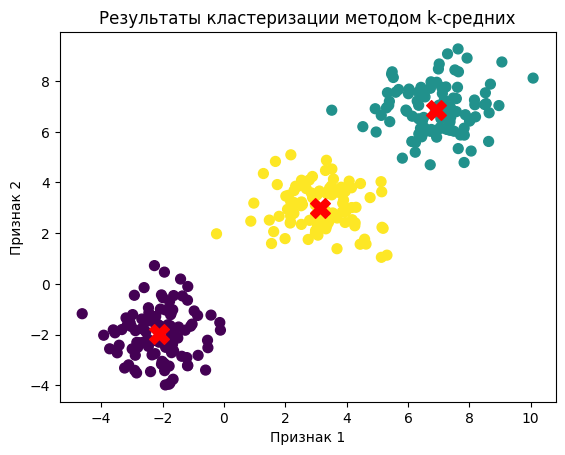

In [185]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Центры кластеров')
plt.title("Результаты кластеризации методом k-средних")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")